# chapter 2
## 1.usa.gov data from bit.ly
### load data and see records purely in python

In [1]:
pwd

u'd:\\inbox\\resources\\pydata-book-master'

In [2]:
path = "ch02/usagov_bitly_data2012-03-16-1331923249.txt"

In [3]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
import json
path = "ch02/usagov_bitly_data2012-03-16-1331923249.txt"
records = [json.loads(line) for line in open(path)]

In [5]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [6]:
records[0]['tz']

u'America/New_York'

In [7]:
print records[0]['tz']

America/New_York


### counting time zones in pure python

In [8]:
#time_zones = [rec['tz'] for rec in records]
#run this line to get an error, i just skipped it

In [9]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:15]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'',
 u'America/Los_Angeles',
 u'America/New_York',
 u'America/New_York',
 u'America/New_York',
 u'Asia/Hong_Kong']

In [10]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts
                

In [11]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

In [12]:
counts1 = get_counts(time_zones)
counts2 = get_counts2(time_zones)

In [13]:
counts1['America/New_York']


1251

In [14]:
len(time_zones)

3440

In [15]:
## top 10 time zones and their count using script
def top_counts(count_dict, n = 10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [16]:
top_counts(counts1)

[(33, u'America/Sao_Paulo'),
 (35, u'Europe/Madrid'),
 (36, u'Pacific/Honolulu'),
 (37, u'Asia/Tokyo'),
 (74, u'Europe/London'),
 (191, u'America/Denver'),
 (382, u'America/Los_Angeles'),
 (400, u'America/Chicago'),
 (521, u''),
 (1251, u'America/New_York')]

In [17]:
## count using counter
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

### count with pandas

In [18]:
from pandas import DataFrame, Series
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
frame = DataFrame(records)

In [19]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [20]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [21]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [22]:
## cleaning ' ' and changing to unknown
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

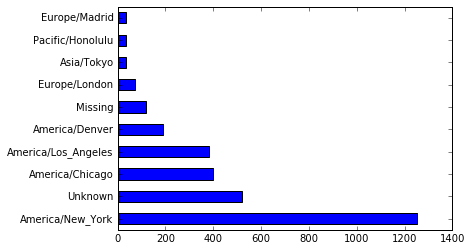

In [23]:
## making horizontal bar plot using panda?

tz_counts[:10].plot(kind='barh', rot=0)
plt.show()

In [24]:
frame['a'][10]
#frame['a'][50]
#frame['a'][51]

u'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [25]:
results = Series([x.split()[0]for x in frame.a.dropna()])

In [26]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [27]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [28]:
cframe = frame[frame.a.notnull()]

In [29]:
import numpy as np
operating_system = np.where(cframe['a'].str.contains('Windows'), 
                            'Windows', 'Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

In [30]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [31]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [32]:
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [33]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


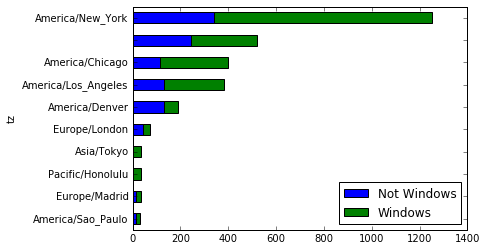

In [34]:
#plotting
count_subset.plot(kind='barh',stacked=True)

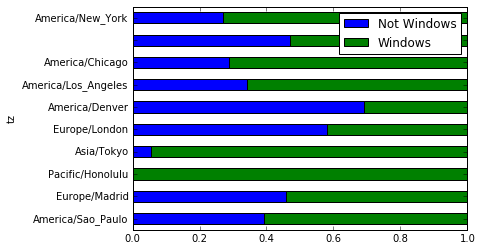

In [35]:
normed_subset = count_subset.div(count_subset.sum(1),axis=0)
normed_subset.plot(kind='barh', stacked=True)

## movielens 1m data set

In [36]:
##loading dataframe
import pandas as pd
import os
encoding = 'latin1'

##define path
upath = os.path.expanduser('ch02/movielens/users.dat')
rpath = os.path.expanduser('ch02/movielens/ratings.dat')
mpath = os.path.expanduser('ch02/movielens/movies.dat')


unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv(upath, sep='::', header=None, names=unames, encoding=encoding, engine='python')
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames, encoding=encoding, engine='python')
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames, encoding=encoding, engine='python')


In [37]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [38]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [39]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [40]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id      1000209 non-null int64
movie_id     1000209 non-null int64
rating       1000209 non-null int64
timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [41]:
data = pd.merge(pd.merge(ratings,users), movies)

In [42]:
data.info()
data.ix[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209 non-null int64
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip           1000209 non-null object
title         1000209 non-null object
genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [43]:
mean_ratings = data.pivot_table('rating', index='title', columns ='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [44]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [45]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)',
       u'101 Dalmatians (1961)', u'101 Dalmatians (1996)',
       u'12 Angry Men (1957)', u'13th Warrior, The (1999)',
       u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)',
       u'2001: A Space Odyssey (1968)', u'2010 (1984)',
       ...
       u'X-Men (2000)', u'Year of Living Dangerously (1982)',
       u'Yellow Submarine (1968)', u'You've Got Mail (1998)',
       u'Young Frankenstein (1974)', u'Young Guns (1988)',
       u'Young Guns II (1990)', u'Young Sherlock Holmes (1985)',
       u'Zero Effect (1998)', u'eXistenZ (1999)'],
      dtype='object', name=u'title', length=1216)

In [46]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1216 entries, 'burbs, The (1989) to eXistenZ (1999)
Data columns (total 2 columns):
F    1216 non-null float64
M    1216 non-null float64
dtypes: float64(2)
memory usage: 28.5+ KB


In [47]:
top_female_ratings = mean_ratings.sort_values(by="F", ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [48]:
top_male_ratings = mean_ratings.sort_values(by="M", ascending=False)
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


### Measuring rating disagreement

In [49]:
mean_ratings['diff']= mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [50]:
#### reverse order of rows, take first 15 rows
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [51]:
#### most disagreement, independent of gender
# standar deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()
# filter down to active titles
rating_std_by_title = rating_std_by_title.ix[active_titles]
# order series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## US baby names 1880-2010

todos
* visualize proportion of babies given a particular name (your own, or another name) over time.
* determine the relative rank of a name.
* determine the most popular names in each year or the names with largest increases or decreases.
* analyze trends in names : vowels, consonants, length, overal diversity, changes in spellin, first and last letters.
* analyze external sources of trends: biblical names, celebrities, demographic changes.

In [52]:
# from http://www.ssa.gov/oact/babynames/limits.html
from __future__ import division
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 5))
np.set_printoptions(precision=4)
%matplotlib inline
%pwd

u'd:\\inbox\\resources\\pydata-book-master'

In [53]:
!head -n 10 ch02/names/yob1880.txt
# ga tau wa

'head' is not recognized as an internal or external command,
operable program or batch file.


In [54]:
# load into dataframes
import pandas as pd
names1880 = pd.read_csv('ch02/names/yob1880.txt', names = ['name', 'sex', 'birth'])
names1880[:5]
names1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
name     2000 non-null object
sex      2000 non-null object
birth    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 46.9+ KB


In [55]:
#grouping sum of the birth column by sex as the total number of birth in that year
names1880.groupby('sex').birth.sum()

sex
F     90993
M    110493
Name: birth, dtype: int64

In [56]:
# the data only came to 2010
years = range(1880,2011)

pieces = []
columns = ['name','sex','birth']

for year in years:
    path = 'ch02/names/yob%d.txt' %year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [57]:
# concatenate everything into a single dataframe
names = pd.concat(pieces, ignore_index=True)

In [58]:
# it got year on names
names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
name     1690784 non-null object
sex      1690784 non-null object
birth    1690784 non-null int64
year     1690784 non-null int64
dtypes: int64(2), object(2)
memory usage: 64.5+ MB


In [59]:
#totaling all
total_birth = names.pivot_table('birth',index='year', columns='sex', aggfunc=sum)
total_birth.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


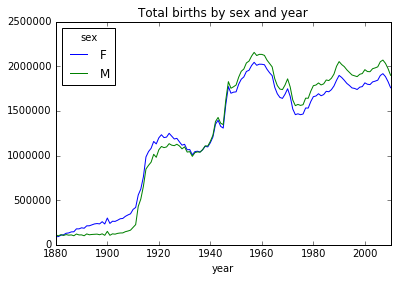

In [60]:
#total birth plot exactly
total_birth.plot(title='Total births by sex and year')

In [61]:
#insert column prop with the fraction of babies given each name relative to 
#the totalnumber of birth
def add_prop(group):
    #integer division floors
    birth = group.birth.astype(float)
    
    group['prop'] = birth / birth.sum()
    return group
names = names.groupby(['year' , 'sex']).apply(add_prop)
names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690784 entries, 0 to 1690783
Data columns (total 5 columns):
name     1690784 non-null object
sex      1690784 non-null object
birth    1690784 non-null int64
year     1690784 non-null int64
prop     1690784 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 77.4+ MB


In [62]:
#sanity check if sum of prop equal to 1
np.allclose(names.groupby(['year','sex']).prop.sum(),1)


True

In [63]:
#get top 1000 for sex/year
def get_top1000(group):
    return group.sort_values(by='birth', ascending=False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

In [64]:
top1000.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 261877 entries, (1880, F, 0) to (2010, M, 1677645)
Data columns (total 5 columns):
name     261877 non-null object
sex      261877 non-null object
birth    261877 non-null int64
year     261877 non-null int64
prop     261877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 12.0+ MB


### analyzing naming trends based on top1000

In [65]:
#boys and girls portion
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']


In [66]:
#pivot table of the total number of births by year and name
total_births = top1000.pivot_table('birth', index='year', columns='name', aggfunc=sum)

In [67]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015BB1438>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000015C92240>], dtype=object)

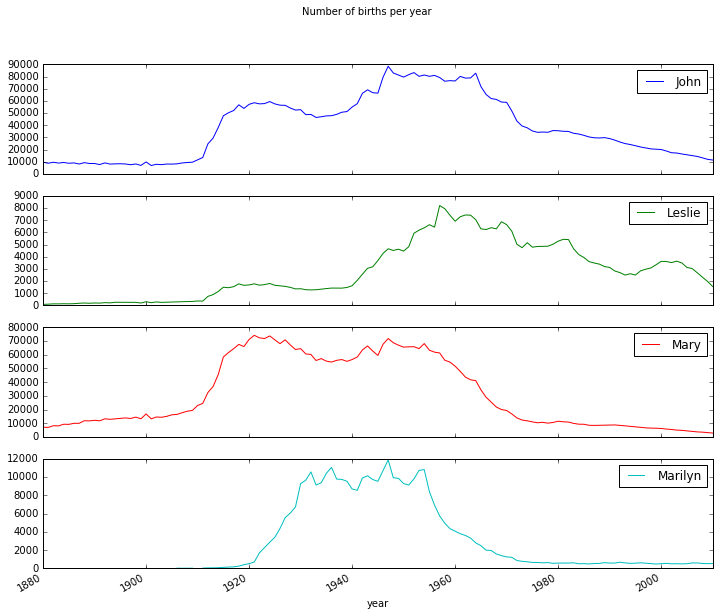

In [68]:
#plotting names
subset = total_births[['John', 'Leslie', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12,10), grid=False, title="Number of births per year")

#### Measuring the increase in naming diversity

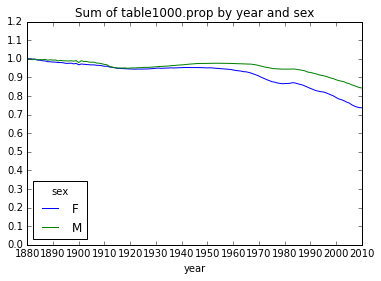

In [69]:
#plotting the increase
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex', yticks = np.linspace(
    0, 1.2, 13), xticks= range(1880,2020,10))

In [70]:
df = boys[boys.year == 2010]
df.head()


name sex  birth  year      prop
year sex                                            
2010 M   1676644    Jacob   M  21875  2010  0.011523
         1676645    Ethan   M  17866  2010  0.009411
         1676646  Michael   M  17133  2010  0.009025
         1676647   Jayden   M  17030  2010  0.008971
         1676648  William   M  16870  2010  0.008887

In [71]:
#how many of the most popular names it takes to reach 50% 
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum.head()


year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
Name: prop, dtype: float64

In [72]:
prop_cumsum.searchsorted(0.5)[0]

116

In [73]:
#comparing to 1900
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop',ascending=False).prop.cumsum()
in1900.searchsorted(0.5)[0] + 1

25

In [74]:
#applying for each year/sex combination
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().searchsorted(q)[0]+1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [75]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


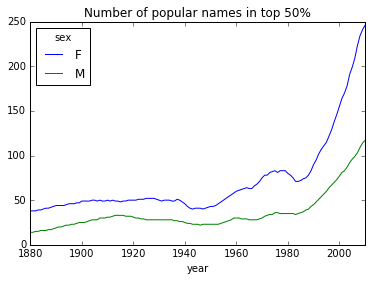

In [76]:
diversity.plot(title="Number of popular names in top 50%")

#### The Last Letter Revolution

In [77]:
#the lastletter Revolution
#extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('birth', index=last_letters, columns=['sex','year'], aggfunc=sum )
table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, a to z
Columns: 262 entries, (F, 1880) to (M, 2010)
dtypes: float64(262)
memory usage: 53.4+ KB


In [78]:
#select three representative years and print the firs few rows
subtable = table.reindex(columns=[1910,1960,2010], level ='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [79]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [80]:
letter_prop = subtable / subtable.sum().astype(float)

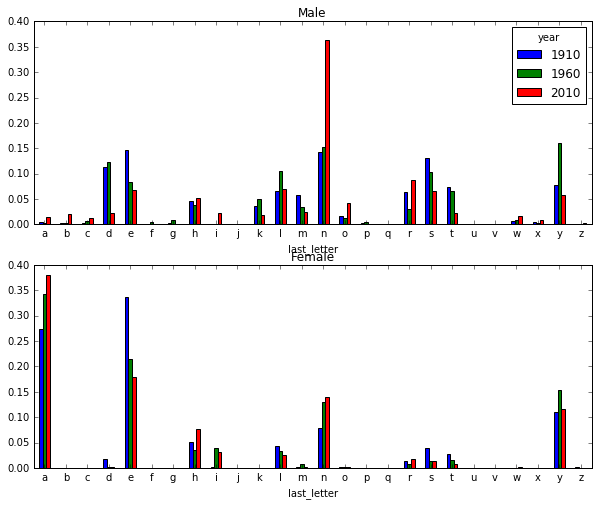

In [81]:
#lets plot
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1, figsize =(10,8))
letter_prop['M'].plot(kind='bar', rot=0, ax = axes[0], title = 'Male')
letter_prop['F'].plot(kind='bar', rot=0, ax = axes[1], title = 'Female', legend=False)
#what do you see

In [82]:
#make time series of d n and y
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


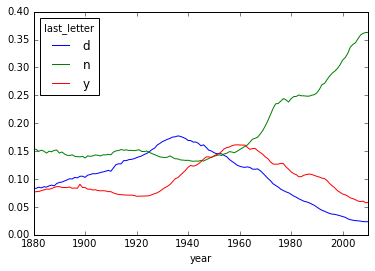

In [83]:
dny_ts.plot()

#### boy names that became girl names (and vice versa)

In [84]:
#looking for leslie
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like


array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [85]:
#filtering names
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').birth.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: birth, dtype: int64

In [86]:
#aggregating by sex and year and normalize
table = filtered.pivot_table('birth', index='year', columns='sex', aggfunc='sum')
table = table.div(table.sum(1),axis = 0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


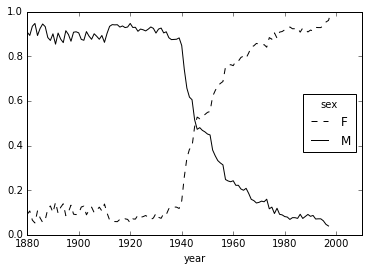

In [87]:
#plot!
table.plot(style={'M': 'k-', 'F': 'k--'})

In [88]:
#end of chapter 2